Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report



Load ao DataFrame

In [2]:
wine_df = pd.read_csv('DS\wine.csv')

Profiling

In [3]:
from ydata_profiling import ProfileReport # profiler

profile = ProfileReport(wine_df, title="Profiling Report", dark_mode=True)
#profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Data Visualization(Demasiados dados no profile)

In [4]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt


(array([0, 1, 2]), [Text(0, 0, '2'), Text(1, 0, '1'), Text(2, 0, '3')])

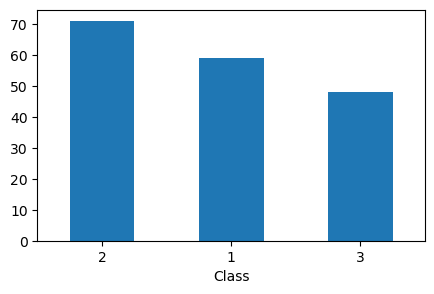

In [5]:
plt.figure(figsize=(5,3))
wine_df["Class"].value_counts().plot(kind='bar')
plt.xticks(rotation=0)

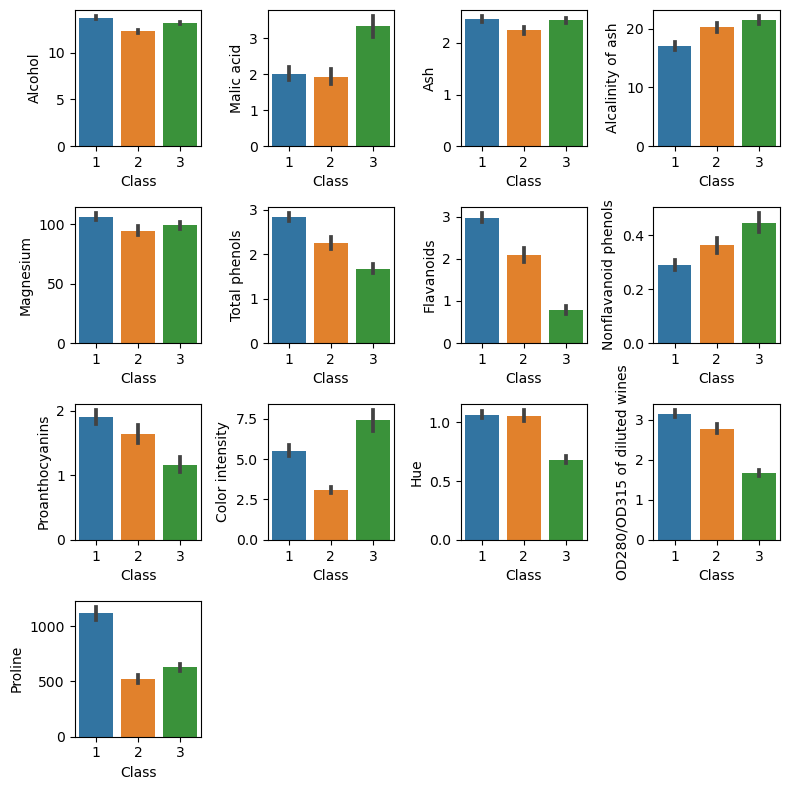

In [6]:
plt.figure(figsize=(8,8))
l=["Alcohol","Malic acid","Ash","Alcalinity of ash","Magnesium","Total phenols","Flavanoids","Nonflavanoid phenols","Proanthocyanins","Color intensity","Hue","OD280/OD315 of diluted wines","Proline"]
for i in l:
    plt.subplot(4, 4, l.index(i) + 1)   # 4 rows, 3 columns
    sns.barplot(x=wine_df["Class"],y=wine_df[i])
plt.tight_layout()

Correlation Check

<Axes: >

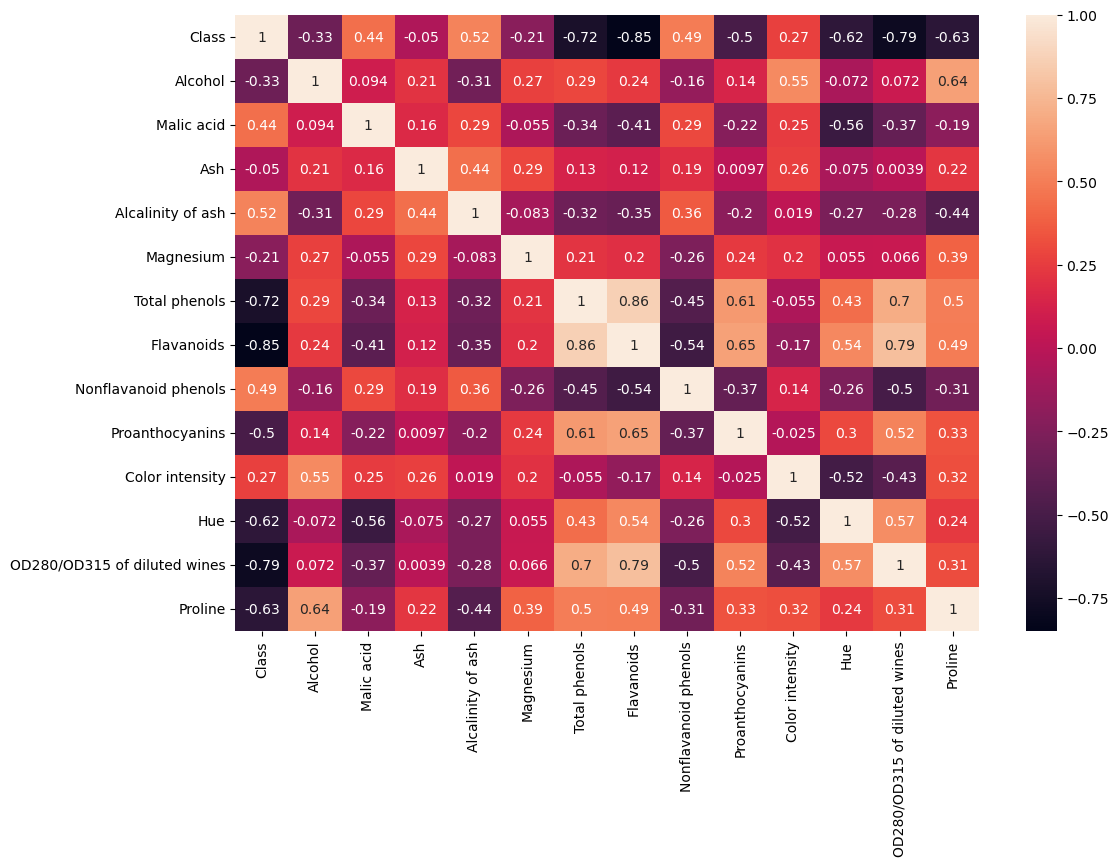

In [7]:
plt.figure(figsize=(12, 8))
cor=wine_df.corr()
sns.heatmap(cor,annot=True)

Text(0.5, 1.0, 'Box Plot of All Columns')

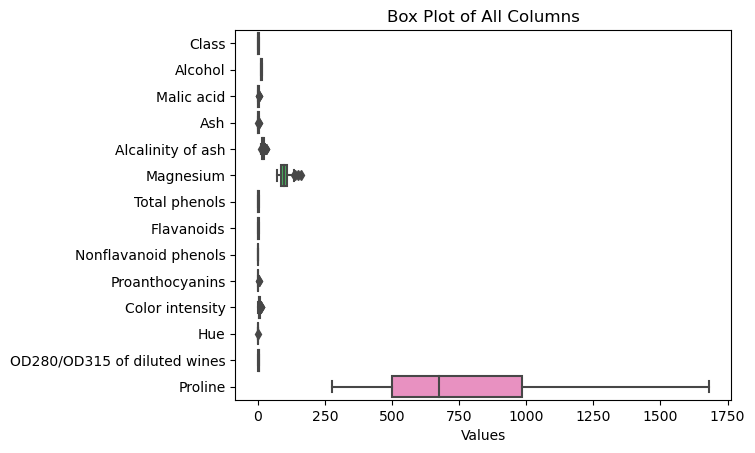

In [8]:
sns.boxplot(data=wine_df, orient='h')  # 'orient' is set to 'h' for horizontal box plots

plt.xlabel('Values')
plt.title('Box Plot of All Columns')

IQR Outlier removal

In [9]:
l1=["Alcohol","Malic acid","Ash","Alcalinity of ash","Magnesium","Total phenols","Flavanoids","Nonflavanoid phenols","Proanthocyanins","Color intensity","Hue","OD280/OD315 of diluted wines","Proline"]
for i in l:
    q1=wine_df[i].quantile(0.25)
    q3=wine_df[i].quantile(0.75)
    iqr=q3-q1
    upperL=q3+1.5*iqr
    lowerL=q1-1.5*iqr
    wine_df[i]=np.where(wine_df[i]>upperL,upperL,np.where(wine_df[i]<lowerL,lowerL,wine_df[i]))

Text(0.5, 1.0, 'Box Plot of All Columns')

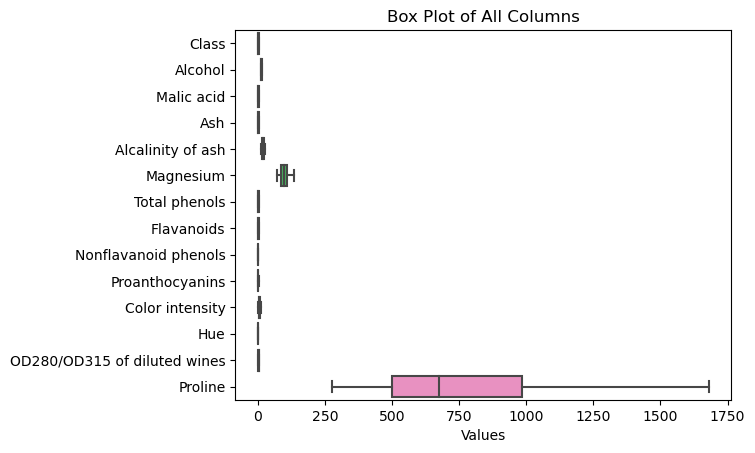

In [10]:
sns.boxplot(data=wine_df, orient='h')  # 'orient' is set to 'h' for horizontal box plots

plt.xlabel('Values')
plt.title('Box Plot of All Columns')

In [11]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    float64
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

Split Dpendent and Independent Variables

In [12]:
y=wine_df.iloc[:,0]
x=wine_df.iloc[:,1:14]
x.info()
y.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Alcohol                       178 non-null    float64
 1   Malic acid                    178 non-null    float64
 2   Ash                           178 non-null    float64
 3   Alcalinity of ash             178 non-null    float64
 4   Magnesium                     178 non-null    float64
 5   Total phenols                 178 non-null    float64
 6   Flavanoids                    178 non-null    float64
 7   Nonflavanoid phenols          178 non-null    float64
 8   Proanthocyanins               178 non-null    float64
 9   Color intensity               178 non-null    float64
 10  Hue                           178 non-null    float64
 11  OD280/OD315 of diluted wines  178 non-null    float64
 12  Proline                       178 non-null    float64
dtypes: fl

x = variaveis
y = class

Train Test Split

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

Training Models

KNN Classifier

In [55]:
model1=KNeighborsClassifier(n_neighbors=3)
model1.fit(x_train, y_train)
y_pred1 = model1.predict(x_test)
print(classification_report(y_test, y_pred1))
print(confusion_matrix(y_test,y_pred1))

              precision    recall  f1-score   support

           1       0.86      0.86      0.86        14
           2       0.92      0.79      0.85        14
           3       0.60      0.75      0.67         8

    accuracy                           0.81        36
   macro avg       0.79      0.80      0.79        36
weighted avg       0.82      0.81      0.81        36

[[12  0  2]
 [ 1 11  2]
 [ 1  1  6]]


Logistic Regression

In [15]:
model2=LogisticRegression(max_iter=10000)
model2.fit(x_train, y_train)
y_pred2 = model2.predict(x_test)
print(classification_report(y_test, y_pred2))
print(confusion_matrix(y_test,y_pred2))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]


Decision Tree Classifier

In [16]:
model3=DecisionTreeClassifier()
model3.fit(x_train, y_train)
y_pred3 = model3.predict(x_test)
print(classification_report(y_test, y_pred3))
print(confusion_matrix(y_test,y_pred3))

              precision    recall  f1-score   support

           1       0.93      0.93      0.93        14
           2       0.93      1.00      0.97        14
           3       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.95      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36

[[13  1  0]
 [ 0 14  0]
 [ 1  0  7]]


Accuracy Check

In [57]:
print("KNN Classifier Accuracy:", accuracy_score(y_test, y_pred1)*100,"%")
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred2)*100,"%")
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred3)*100,"%")

KNN Classifier Accuracy: 80.55555555555556 %
Logistic Regression Accuracy: 100.0 %
Decision Tree Accuracy: 94.44444444444444 %


Oversampling (SMOTE)

In [58]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

(array([0, 1, 2]), [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3')])

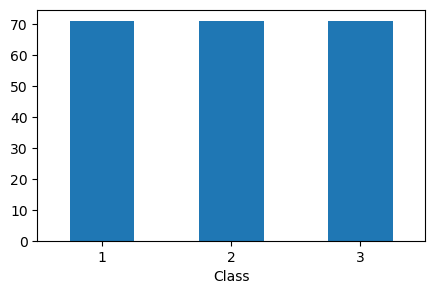

In [59]:
plt.figure(figsize=(5,3))
y_resampled.value_counts().plot(kind='bar')
plt.xticks(rotation=0)

Train Test Split

In [60]:
x_train_resampled,x_test_resampled,y_train_resampled,y_test_resampled=train_test_split(x_resampled,y_resampled,test_size=0.2,random_state=42)

KNN Classifier

In [61]:
model1=KNeighborsClassifier(n_neighbors=3)
model1.fit(x_train_resampled, y_train_resampled)
y_pred1_resampled = model1.predict(x_test_resampled)
print(classification_report(y_test_resampled, y_pred1_resampled))
print(confusion_matrix(y_test_resampled,y_pred1_resampled))

              precision    recall  f1-score   support

           1       0.58      1.00      0.73        11
           2       0.69      0.64      0.67        14
           3       0.82      0.50      0.62        18

    accuracy                           0.67        43
   macro avg       0.70      0.71      0.67        43
weighted avg       0.72      0.67      0.66        43

[[11  0  0]
 [ 3  9  2]
 [ 5  4  9]]


Logistic Regression

In [62]:
model2=LogisticRegression(max_iter=10000)
model2.fit(x_train_resampled, y_train_resampled)
y_pred2_resampled = model2.predict(x_test_resampled)
print(classification_report(y_test_resampled, y_pred2_resampled))
print(confusion_matrix(y_test_resampled,y_pred2_resampled))

              precision    recall  f1-score   support

           1       0.92      1.00      0.96        11
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00        18

    accuracy                           0.98        43
   macro avg       0.97      0.98      0.97        43
weighted avg       0.98      0.98      0.98        43

[[11  0  0]
 [ 1 13  0]
 [ 0  0 18]]


In [63]:
model3=DecisionTreeClassifier()
model3.fit(x_train_resampled, y_train_resampled)
y_pred3_resampled = model3.predict(x_test_resampled)
print(classification_report(y_test_resampled, y_pred3_resampled))
print(confusion_matrix(y_test_resampled,y_pred3_resampled))

              precision    recall  f1-score   support

           1       0.85      1.00      0.92        11
           2       0.80      0.86      0.83        14
           3       0.93      0.78      0.85        18

    accuracy                           0.86        43
   macro avg       0.86      0.88      0.86        43
weighted avg       0.87      0.86      0.86        43

[[11  0  0]
 [ 1 12  1]
 [ 1  3 14]]


Support Vector Machines

Random Forest Classifier

In [64]:
model4 = RandomForestClassifier(min_samples_split=2, max_depth=20, n_estimators=100, random_state=42)
model4.fit(x_train_resampled, y_train_resampled)
y_pred5_resampled = model4.predict(x_test_resampled)
print(classification_report(y_test_resampled, y_pred5_resampled))
print(confusion_matrix(y_test_resampled,y_pred5_resampled))

              precision    recall  f1-score   support

           1       0.92      1.00      0.96        11
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00        18

    accuracy                           0.98        43
   macro avg       0.97      0.98      0.97        43
weighted avg       0.98      0.98      0.98        43

[[11  0  0]
 [ 1 13  0]
 [ 0  0 18]]


Accuracy Check (SMOTE)

In [65]:
print("SMOTE Results:")
print("KNN Classifier Accuracy:", accuracy_score(y_test_resampled, y_pred1_resampled)*100,"%")
print("Logistic Regression Accuracy:", accuracy_score(y_test_resampled, y_pred2_resampled)*100,"%")
print("Decision Tree Accuracy:", accuracy_score(y_test_resampled, y_pred3_resampled)*100,"%")
#print("Suport Vector Machines Accuracy:", accuracy_score(y_test_resampled, y_pred4_resampled)*100,"%")
print("Random Forest Accuracy:", accuracy_score(y_test_resampled, y_pred5_resampled)*100,"%")

SMOTE Results:
KNN Classifier Accuracy: 67.44186046511628 %
Logistic Regression Accuracy: 97.67441860465115 %
Decision Tree Accuracy: 86.04651162790698 %
Random Forest Accuracy: 97.67441860465115 %


provavelmente ainda está a dar overfit......................................................

K-Fold Cross-Validation